In [1]:
import mysql.connector
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Connection to the database
host = credentials['Value'][0]
user = credentials['Value'][1]
password = credentials['Value'][2]
database = credentials['Value'][3]
port = credentials['Value'][4]
mydb = mysql.connector.connect(host=host, user=user, database=database, port=port, password=password, auth_plugin='mysql_native_password')
mycursor = mydb.cursor()

#Safecheck to guarantee that the connection worked
mycursor.execute('SHOW TABLES;')
print(f"Tables: {mycursor.fetchall()}")
print(mydb.connection_id) #it'll give connection_id,if got connected

Tables: [('ConsultaUrgencia_doentespedidosconsultaNeurologia2012',), ('consultaneurologia2012',), ('consultaneurologia201216anon_true',)]
313


In [4]:
alertP1 = pd.read_sql("""SELECT * FROM consultaneurologia201216anon_true""",mydb)
alertP1
alertP1.info()

/Users/gabrielabib/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10150 entries, 0 to 10149
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID_DOENTE            10150 non-null  object
 1   PROCESSO             10150 non-null  object
 2   COD_REFERENCIA       10150 non-null  object
 3   COD_PZ               10150 non-null  object
 4   COD_UNID_SAUDE_PROV  10150 non-null  int64 
 5   UNID_PROV            10150 non-null  object
 6   TIPO_UNID            10150 non-null  object
 7   PROVENIENCIA         10150 non-null  object
 8   COD_CTH_PRIOR        10150 non-null  object
 9   CTH_PRIOR            10150 non-null  object
 10  COD_MOTIVO_RECUSA    10150 non-null  int64 
 11  DES_MOTIVO_RECUSA    10150 non-null  object
 12  COD_ESPECIALIDADE    10150 non-null  int64 
 13  DES_ESPECIALIDADE    10150 non-null  object
 14  agrupadora           10150 non-null  object
 15  OUTRA_ENTIDADE       10150 non-null  int64 
 16  DATA

122
0
0.0
0          4332
3150502     394
3151672     379
3150671     365
3150572     361
           ... 
4121100       1
3111400       1
4070571       1
3150872       1
4121101       1
Name: COD_UNID_SAUDE_PROV, Length: 122, dtype: int64


<AxesSubplot:xlabel='COD_UNID_SAUDE_PROV', ylabel='count'>

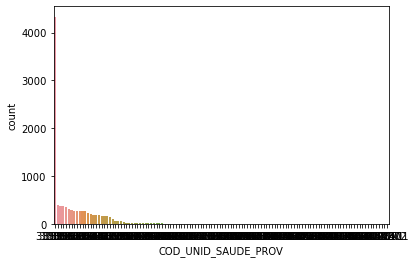

In [5]:
print(alertP1["COD_UNID_SAUDE_PROV"].nunique())

#number of empty values
print(alertP1["COD_UNID_SAUDE_PROV"].isna().sum())

#percentage of empty cells
print(alertP1["COD_UNID_SAUDE_PROV"].isnull().sum()/alertP1["COD_UNID_SAUDE_PROV"].shape[0] * 100)

#the frequency of the values
print(alertP1["COD_UNID_SAUDE_PROV"].value_counts())

#sns.countplot(alertP1["COD_MOTIVO_RECUSA"],order=alertP1["COD_MOTIVO_RECUSA"].sort_values())

sns.countplot(x = 'COD_UNID_SAUDE_PROV',
                data = alertP1,
                order = alertP1['COD_UNID_SAUDE_PROV'].value_counts().index)

120
0
0.0
                                  4332
CHARNECA DA CAPARICA               394
USF AMORA SAUDAVEL                 379
USF COVA DA PIEDADE-CS C PIEDA     365
USF MONTE DA CAPARICA              361
                                  ... 
CARNAXIDE                            1
USF EBORAE-CS EVORA                  1
USF QUINTA DA LOMBA                  1
USF ORIENTE                          1
ASSUMAR                              1
Name: UNID_PROV, Length: 120, dtype: int64


<AxesSubplot:xlabel='UNID_PROV', ylabel='count'>

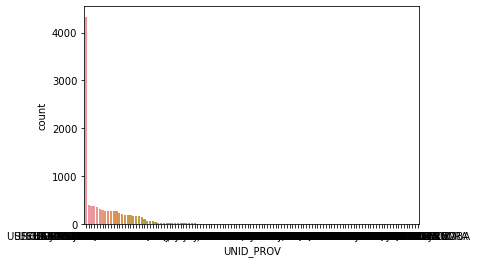

In [6]:
print(alertP1["UNID_PROV"].nunique())

#number of empty values
print(alertP1["UNID_PROV"].isna().sum())

#percentage of empty cells
print(alertP1["UNID_PROV"].isnull().sum()/alertP1["UNID_PROV"].shape[0] * 100)

#the frequency of the values
print(alertP1["UNID_PROV"].value_counts())

#sns.countplot(alertP1["COD_MOTIVO_RECUSA"],order=alertP1["COD_MOTIVO_RECUSA"].sort_values())

sns.countplot(x = 'UNID_PROV',
                data = alertP1,
                order = alertP1['UNID_PROV'].value_counts().index)

3
0
0.0
CS/USF    5681
OUTRA     4332
HOSP       137
Name: TIPO_UNID, dtype: int64


<AxesSubplot:xlabel='TIPO_UNID', ylabel='count'>

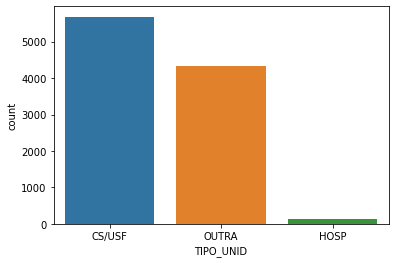

In [7]:
print(alertP1["TIPO_UNID"].nunique())

#number of empty values
print(alertP1["TIPO_UNID"].isna().sum())

#percentage of empty cells
print(alertP1["TIPO_UNID"].isnull().sum()/alertP1["TIPO_UNID"].shape[0] * 100)

#the frequency of the values
print(alertP1["TIPO_UNID"].value_counts())

#sns.countplot(alertP1["COD_MOTIVO_RECUSA"],order=alertP1["COD_MOTIVO_RECUSA"].sort_values())

sns.countplot(x = 'TIPO_UNID',
                data = alertP1,
                order = alertP1['TIPO_UNID'].value_counts().index)

62
0
0.0
0      5818
195    3528
2       298
116     116
237      91
       ... 
219       1
341       1
282       1
357       1
335       1
Name: OUTRA_ENTIDADE, Length: 62, dtype: int64


<AxesSubplot:xlabel='OUTRA_ENTIDADE', ylabel='count'>

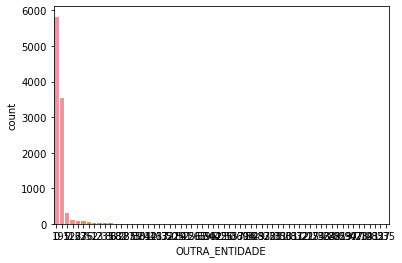

In [8]:

print(alertP1["OUTRA_ENTIDADE"].nunique())

#number of empty values
print(alertP1["OUTRA_ENTIDADE"].isna().sum())

#percentage of empty cells
print(alertP1["OUTRA_ENTIDADE"].isnull().sum()/alertP1["OUTRA_ENTIDADE"].shape[0] * 100)

#the frequency of the values
print(alertP1["OUTRA_ENTIDADE"].value_counts())

#sns.countplot(alertP1["COD_MOTIVO_RECUSA"],order=alertP1["COD_MOTIVO_RECUSA"].sort_values())

sns.countplot(x = 'OUTRA_ENTIDADE',
                data = alertP1,
                order = alertP1['OUTRA_ENTIDADE'].value_counts().index)

4
0
0.0
CTH    5672
SAM    2831
       1382
SON     265
Name: PROVENIENCIA, dtype: int64


<AxesSubplot:xlabel='PROVENIENCIA', ylabel='count'>

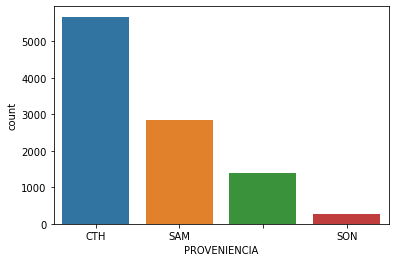

In [9]:

print(alertP1["PROVENIENCIA"].nunique())

#number of empty values
print(alertP1["PROVENIENCIA"].isnull().sum())

#percentage of empty cells
print(alertP1["PROVENIENCIA"].isnull().sum()/alertP1["PROVENIENCIA"].shape[0] * 100)

#the frequency of the values
print(alertP1["PROVENIENCIA"].value_counts())

#sns.countplot(alertP1["COD_MOTIVO_RECUSA"],order=alertP1["COD_MOTIVO_RECUSA"].sort_values())

sns.countplot(x = 'PROVENIENCIA',
                data = alertP1,
                order = alertP1['PROVENIENCIA'].value_counts().index)

4
0
0.0
     7749
3    2335
2      60
1       6
Name: COD_CTH_PRIOR, dtype: int64


<AxesSubplot:xlabel='COD_CTH_PRIOR', ylabel='count'>

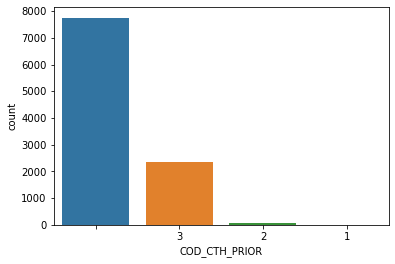

In [10]:
print(alertP1["COD_CTH_PRIOR"].nunique())

#number of empty values
print(alertP1["COD_CTH_PRIOR"].isna().sum())

#percentage of empty cells
print(alertP1["COD_CTH_PRIOR"].isnull().sum()/alertP1["COD_CTH_PRIOR"].shape[0] * 100)

#the frequency of the values
print(alertP1["COD_CTH_PRIOR"].value_counts())

#sns.countplot(alertP1["COD_MOTIVO_RECUSA"],order=alertP1["COD_MOTIVO_RECUSA"].sort_values())

sns.countplot(x = 'COD_CTH_PRIOR',
                data = alertP1,
                order = alertP1['COD_CTH_PRIOR'].value_counts().index)

4
0
0.0
                     7749
Normal               2335
Prioritário            60
Muito Prioritário       6
Name: CTH_PRIOR, dtype: int64


<AxesSubplot:xlabel='CTH_PRIOR', ylabel='count'>

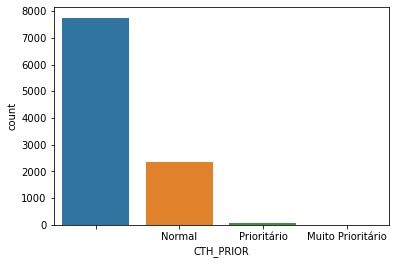

In [11]:
print(alertP1["CTH_PRIOR"].nunique())

#number of empty values
print(alertP1["CTH_PRIOR"].isna().sum())

#percentage of empty cells
print(alertP1["CTH_PRIOR"].isnull().sum()/alertP1["CTH_PRIOR"].shape[0] * 100)

#the frequency of the values
print(alertP1["CTH_PRIOR"].value_counts())

#sns.countplot(alertP1["COD_MOTIVO_RECUSA"],order=alertP1["COD_MOTIVO_RECUSA"].sort_values())

sns.countplot(x = 'CTH_PRIOR',
                data = alertP1,
                order = alertP1['CTH_PRIOR'].value_counts().index)